In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv("Crop_recommendation.csv")

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.shape

(2200, 8)

In [6]:
#to check null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
#to check duplicates
df.duplicated().sum()

0

In [8]:
#to check datatype
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

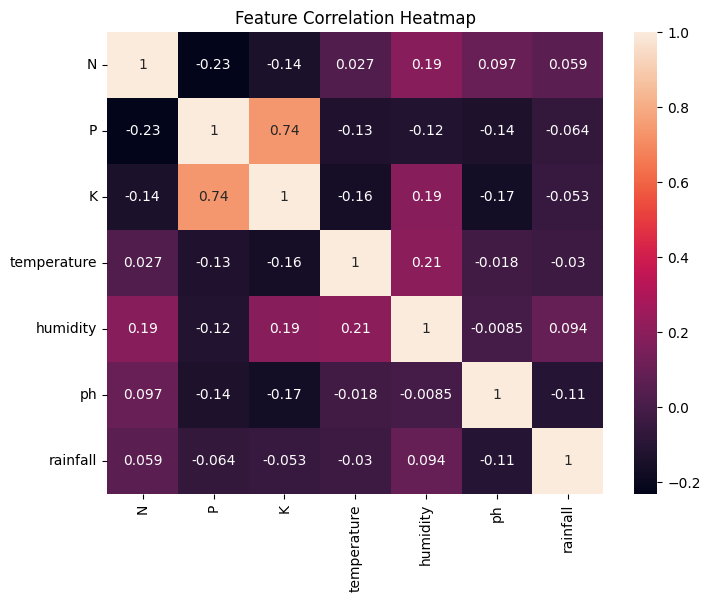

In [9]:
plt.figure(figsize=(8,6))
sb.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [10]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [11]:
#encoding
#import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [12]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label            int32
dtype: object

In [13]:
X=df.drop('label',axis=1)      
Y=df['label']    

In [14]:
X.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [18]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=1),
    "SVM": SVC(kernel='rbf', C=10, gamma=0.1, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=1),
    "XGBoost": XGBClassifier(use_label_encoder=False,random_state=1)
}

results = {}


In [19]:
def create_model(name,model):        
    model.fit(X_train,Y_train)      #train the model with 70% data
    Y_pred=model.predict(X_test)    #test the model with 30% data
    acc = accuracy_score(Y_test, Y_pred)
    results[name] = acc 
    
    print(f" Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("\n Confusion Matrix:")
    print(confusion_matrix(Y_test, Y_pred))
    print("\n Classification Report:")
    print(classification_report(Y_test, Y_pred))
    print("-"*60, "\n")
    
    return model   

In [20]:
# Loop through all models
trained_models = {}
for name, model in models.items():
    trained_models[name] = create_model(name, model)

# Final dictionary with all accuracies
print("\n Summary of Accuracies:", results)

 Model: Random Forest
Accuracy: 0.9970

 Confusion Matrix:
[[31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 33 

In [21]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")


Random Forest: Mean Accuracy = 0.9945, Std = 0.0023
SVM: Mean Accuracy = 0.4182, Std = 0.0209
KNN: Mean Accuracy = 0.9795, Std = 0.0014
Logistic Regression: Mean Accuracy = 0.9700, Std = 0.0062
XGBoost: Mean Accuracy = 0.9927, Std = 0.0033


In [22]:
import pickle

# Train Random Forest
final_model = models["Random Forest"]
final_model.fit(X_train, Y_train)

# Save the trained model
with open("crop_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

# Save the label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


In [23]:

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    
    with open("crop_model.pkl", "rb") as f:
        model = pickle.load(f)
    with open("label_encoder.pkl", "rb") as f:
        le = pickle.load(f)
    
    # input
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
    # Predict crop
    pred = model.predict(input_data)
    crop = le.inverse_transform(pred)[0]
    
    return crop


In [24]:
print("Recommended Crop:", predict_crop(90, 42, 43, 20.5, 80, 6.5, 200))


Recommended Crop: rice
